In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from statsmodels.tsa.stattools import acf
import statsmodels.api as sm

In [34]:
data = pd.read_csv('https://covid19.who.int/WHO-COVID-19-global-data.csv')
data

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
323263,2023-09-23,ZW,Zimbabwe,AFRO,0,265748,0,5718
323264,2023-09-24,ZW,Zimbabwe,AFRO,0,265748,0,5718
323265,2023-09-25,ZW,Zimbabwe,AFRO,0,265748,0,5718
323266,2023-09-26,ZW,Zimbabwe,AFRO,0,265748,0,5718


In [35]:
data=data[data['Country']=='United States of America']
data=data[['Date_reported','New_cases']]

In [36]:
data=data[data['Date_reported']>='2022-10-01']

In [52]:
data=data.reset_index()

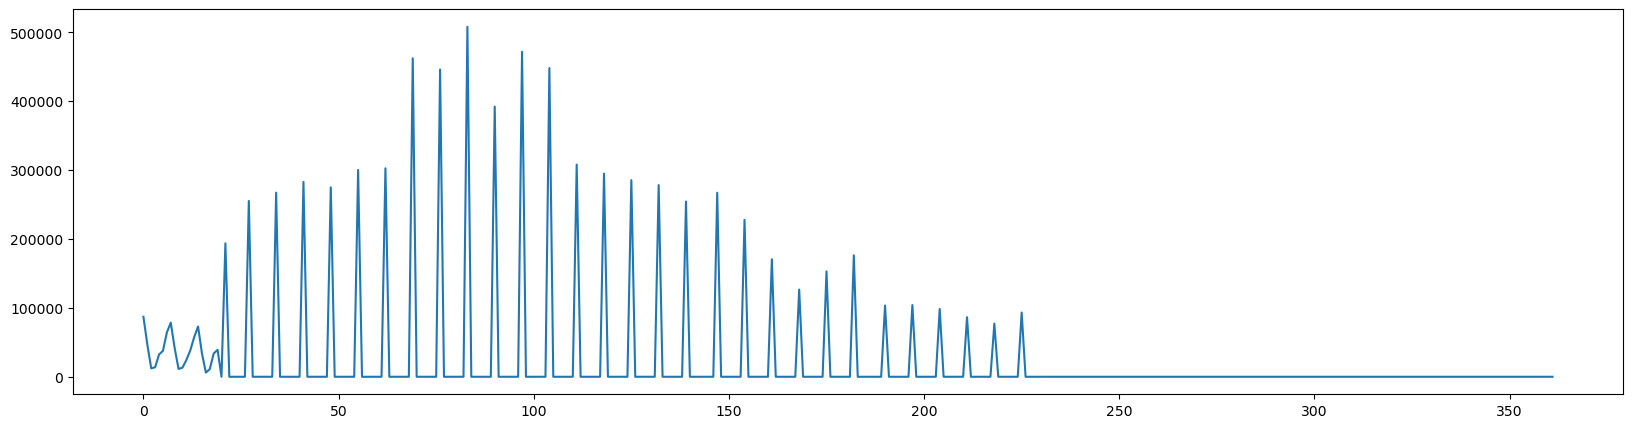

In [58]:
plt.figure(figsize=(20,5))
plt.plot(data['New_cases'])

In [64]:
def kernelsmoothing(x,b):
    L=[]
    n=len(x)
    for t in range(n):
        Lt,Lt2=[],[]
        for j in range(n):
            K_jt=norm.pdf((j-t)/b)
            Lt.append(K_jt)
        den=sum(Lt)
        for i in range(n):
            w_it=Lt[i]/den
            wx_it=w_it*x[i]
            Lt2.append(wx_it)
        m_t=sum(Lt2)
        L.append(m_t)
    plt.figure(figsize=(20,5))
    plt.plot(x,'c')
    plt.plot(L,'r')
    plt.show()

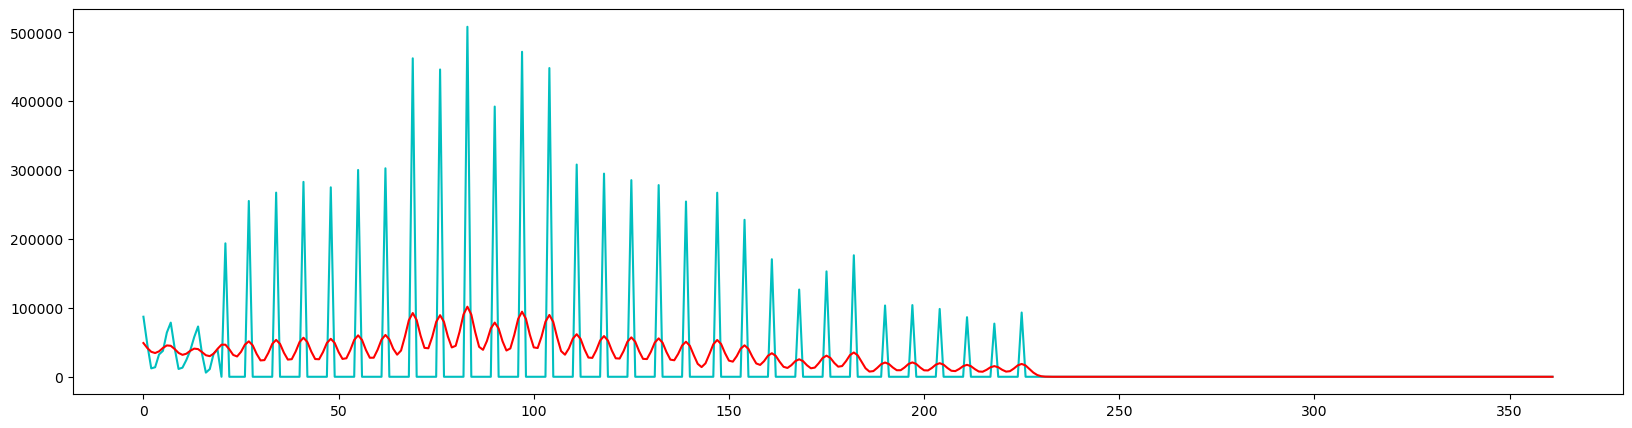

In [66]:
kernelsmoothing(data['New_cases'],2)

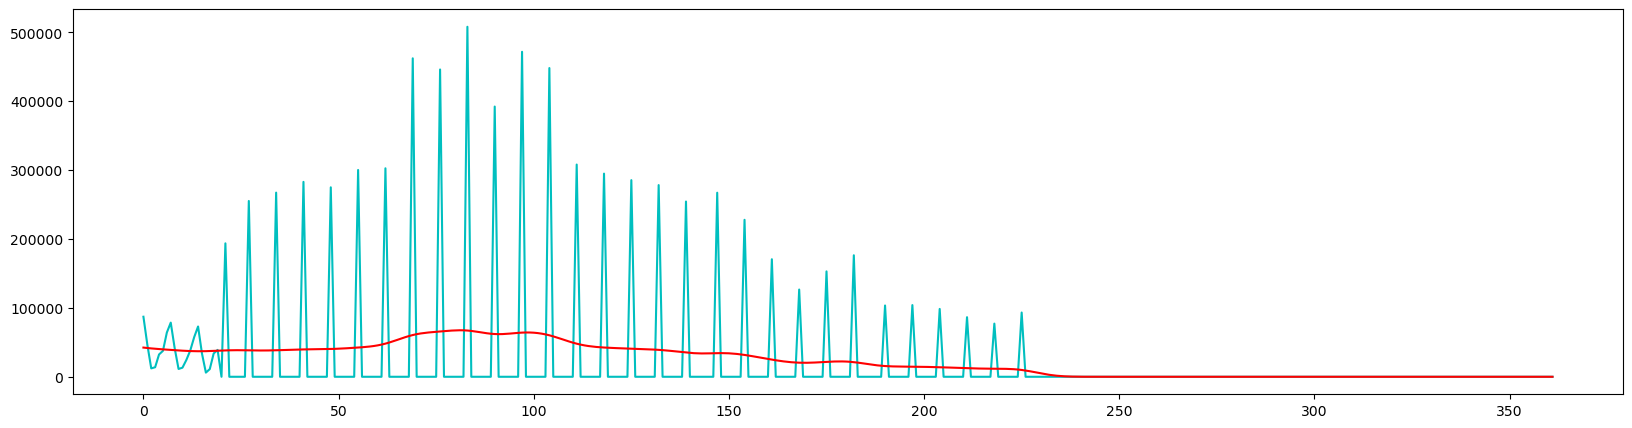

In [67]:
kernelsmoothing(data['New_cases'],5)

In [68]:
def ma(theta,sig,n):
    L=[]
    wt=np.random.normal(0,sig**0.5,n)
    for t in range(1,n):
        xt=wt[t]+theta*wt[t-1]
        L.append(xt)
    return L

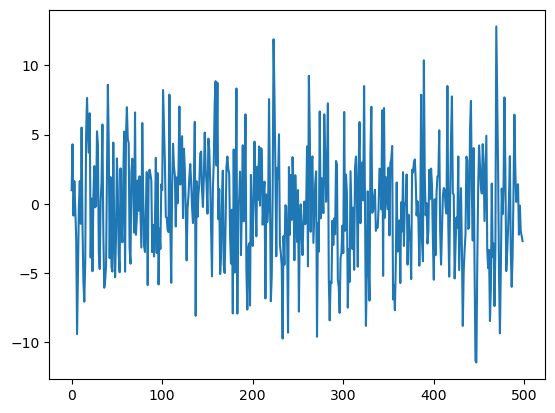

In [72]:
plt.plot(ma(0.25,16,500))

In [74]:
def SACF(y):
    L=[]
    n=len(y)
    mu=np.mean(y)
    for h in range(0,6):
        Lh=[]
        for t in range(0,n-h):
            ac=(y[t+h]-mu)*(y[t]-mu)
            Lh.append(ac)
        autocov_h=sum(Lh)/n
        L.append(autocov_h)
    sacf=L/L[0]
    return sacf

In [90]:
ma_1=ma(0.25,16,500)
ma_2=ma(0.25,16,1000)
ma_3=ma(4,1,500)
ma_4=ma(4,1,1000)

In [91]:
print(SACF(ma_1))
print(SACF(ma_2))
print(SACF(ma_3))
print(SACF(ma_4))

[ 1.          0.18097429 -0.02984321  0.00440507  0.1069893  -0.00136413]
[ 1.          0.27272037  0.01693591  0.02399811 -0.03654308 -0.02715064]
[1.         0.1762932  0.00409046 0.05225997 0.01902816 0.00308337]
[ 1.          0.22891844 -0.05661302 -0.02191533 -0.02248113 -0.00675341]


In [94]:
def AR(phi, n):
    Lx = []
    x0 = 0
    for t in range(n):
        xt = phi*x0+np.random.normal(0,1)
        Lx.append(xt)
        x0 = xt
    return Lx

In [96]:
ar_1=AR(0.3,400)
ar_2=AR(0.8,400)
ar_3=AR(-0.9,400)

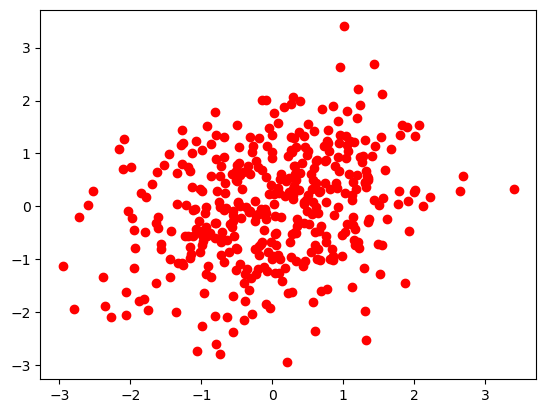

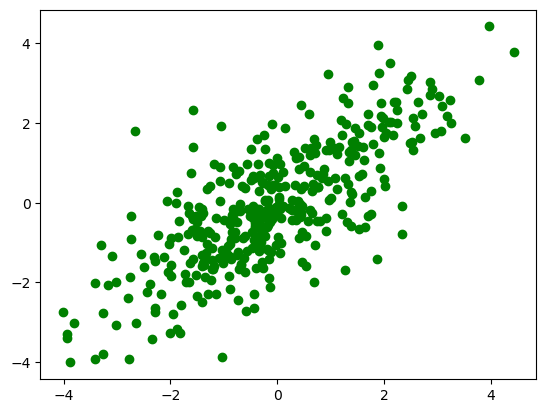

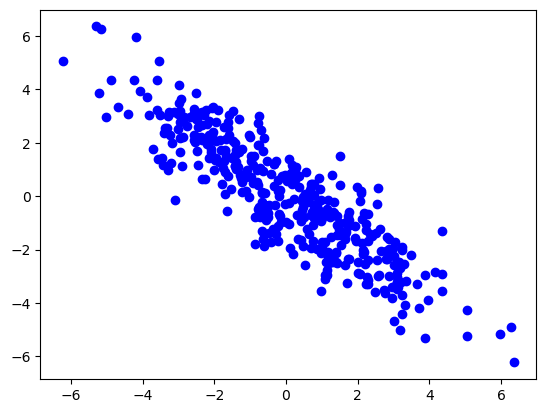

In [108]:
plt.scatter(ar_1[:-1],ar_1[1:],color='r')
plt.show()
plt.scatter(ar_2[:-1],ar_2[1:],color='g')
plt.show()
plt.scatter(ar_3[:-1],ar_3[1:],color='b')
plt.show()

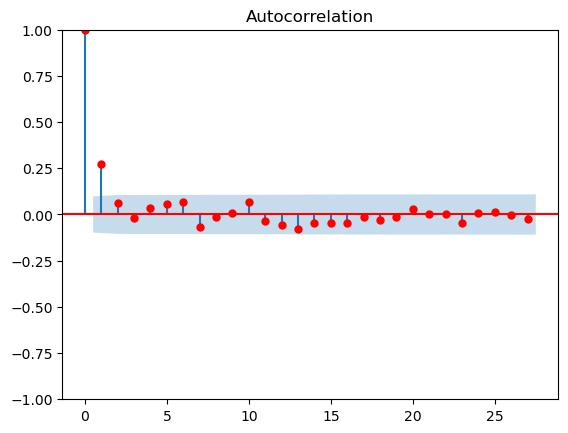

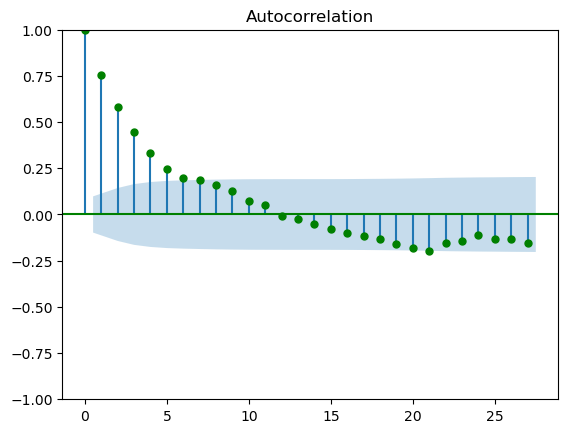

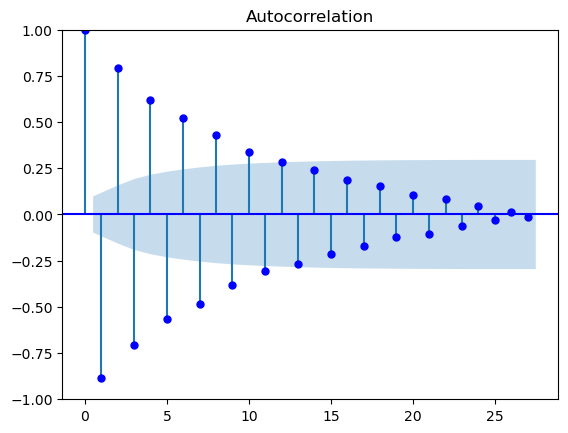

In [118]:
sm.graphics.tsa.plot_acf(np.array(ar_1),color='r')
plt.show()
sm.graphics.tsa.plot_acf(np.array(ar_2),color='g')
plt.show()
sm.graphics.tsa.plot_acf(np.array(ar_3),color='b')
plt.show()